In [22]:
import imageio
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
%matplotlib inline

from os.path import exists
from numba import jit as execute_quickly
import requests

/home/andreas/src/env-3.6/lib/python3.6/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [15]:
if 1:
    # Slow-Motion slack-y rope wave

    video_url = "https://public.boxcloud.com/d/1/b1!pHGwXK-e9wlnBW_IIvzvyCu7zrjTQ1vWFo6Xxw8ccv2IMvxe-0RTShmUAi1AQtqjROTmqoFrBqQiS5FhjaRvfZYQVYx1pj0bFJNIzyq3CL9sTgE8svH8zfzxvC_aHipkGvTOSNgGOPJqOUyF4idoDz28TIvv3TXSkuejlE774NVTo8oLZQ7fG0D5uUxGOHgWLu0x8jBtz4DbKywFlQ8elp05cpRsrciMY5o1pPkYgPpMRH8VgyFU7WYyjvSxzn2t6lfOpfSDhWKe7TgOx3us9jTNrBhhlruehA6aQvPmsqjr9OejP9G7ujgG8xUOu8Cb9HtgH39yufWnaCes4-ClaCMWb_4nXCrAAx7mjXhySXNM8L3zKw9NR-oXdnxvTi7T-5NlrSR96h6Up2fBt5FDyTM2anLKc2bvNeGZkBpMSOj6fMxfYlDYU9rR8MRHm8whm98lpIIbediaolhF7StMyf7necjPrmvarETWpS8-OFaUmFCPqc1wLWOq-tdZpxB8PfADbBTekF2gKmZDEdSOlZy0lRlEmaL4zxgAhGyH403tTXjsJVN1fVKS16ErTVfH6kREvz2V25NLJR3CstgRB8giejyOuZeh56_aJ5ymh_xxjLqCRWLUFo0CLof-f0lVsgdYBvlDP-2-zaeIMZomHETiEXXIwrZFVL9noAh-ziFAsl-OBaeR1ul0z6RDnyGTqdgP3tNniQhnlteZeCFl2Gyi8ADArKSKbjfNl8t8aXH4ylhNdRg-7VB3S3z3OELQGthntxmMcq4yrDc7Lqwa8aL02DkaDxbqgvhjC_lvpDv_qRn-oG4oNxTwVOLOEQ4x1mmFwoz4z2b8-xCkqpj2gcgpuh-hEXVXbLHUH1bHLa50s3SiIKV5Bd9gpkNYUc0dmVIxT3DMO_cZYEtfNXpiClso1Z8GB4D9o-L-6OZHFNj29lwSQtnReMrXFYt7u0vlftH3UGdFsJ5NoQAcfU-6R2lwfm0I-igAxAOp9UX61SUCcVtDjTKYdlazowdEm6OFSW60BIFrCiyKhbzcGhsRxGaTwog9EoAu0E2EDsvVjeyyEq283Hd0zx_2myJ5T_nkvzT3H3QJz_ZDyHAbWtJmmZMJSmXo17SRQL3uUHj6KODW6GROisvJI8-LRou7iOVEkuhUZb6aVt3M4M8qSsqA8ugBAfU6c2SbnYWuU2scukxbKHjXKUQ0NLL8Cj7zVB_9ab41Br5GUaGd3TXG/download"
    video_filename = "rope-wave-1.mp4"
else:
    video_url = "https://public.boxcloud.com/d/1/b1!t3FFau62_I-iyiPNdFOVRc2em8aLLgKzg5leaRP44TPtGiasgNzDkxxqIyZRMcu8SLgHLsHnLcx1vBuPHHuakUgXPSswEvuJWBrsHfHmIdn6DCdY6G1A5CihE3C38qNeVyZPqFskXXItRCyJqy7OgBfvB8qMiUh9pz8PjK0J_OSnKQ_KqwSCqNV7juNyztI_GtzFJqzr4aQdOPBiEIKv5JhuP4D-DUXc3pPkMEb-E1GOpsEQySjFFucdSN8FdHz9kxdpJEJYn2vsE-hdWnBRRqMuhuMiHRMXU7X-pZyfMS2V74exnBkDDocbZ4v7yZ1vAjNBVdkrKEeVSKudTOLAF16XtQObxtsljtGh9cz1ysNiDvdmmfjV3VjR8ZDhDPSgRq9KUrfMSR3vlQ76rzweJf7C_59in3GxHXnNHzs7qP24zx_1delxeBpvNpyvUrUdNmtews7U5axaFrRJuI0XrJ08FPwlHvnCFQwsAbozeRKAZZKICw8lzVDonw1VordN1zfg1mu4RPvSDej25VkEZmXSxfAX2GU6do1wvZSVJ0RfU1-rbgf0evFGdkN20AEYjTmjNQYbcdy2a6DGshRtzGTICYs9E4ieONyNDsvlPdzNDAAbQ_bPQDXf6zcsS2PGVyJbt5iarRu_8-jsW9xHQ6BDVbS39Q1N6DFSQm-_4d40d13frf0cWWXeo35Qy23dE_Cjq_qIFgadpiH9V7RQxiORcO8JSs-lUPbHTIdhrkzuWvIEN5CujvAf-O0gP9PzHm2kgQVwnVvgGcmIYSt2oRIgoJ_PwJivbmg5dpH1QtDQ8J8KDhNFwtIwPfd5Lzlh0pdydfU-d2gt9BnfsR7XA4DNmfFI6ZEKgHby1kNcZpgNXlhc8AQBQNVxmhCKqnWp2Y2zb7u_-Mj5sl1mf9cS7aVRWYzwja4-vCs6-sBmsm8w1ebczQwcEdxpETLMVoqrer2Hk8PZW7L2nl8QX_kwDbdGGINs7a-dokPdZvecGgfmrXxyno9pVcIWGYrEZO5b8XzfWrdYRwEYHvR5TWctBMgH7wRsUSUGddh1XBCcGAwk-TM8XA9LRncAIuk-0YrE9O3obcqMJps91poB4Sllk_eUX40ZXOJTpWgZIKnkSvwJjy0qzUj5y83Me51vlNTLGE_UxF9EYQX8ybSmbllc2B0SsHGqeaRNo-AYNKZUbBe7Ll9dqQfv7e9MrLbvBZoafAZwUaQKcdSLyXdj4FZoL5DJ6sR_K_rBGZB85-c./download"
    video_filename = "rope-plucked.mp4"


In [16]:
if not exists(video_filename):
    r = requests.get(video_url, stream=True)
    r.raise_for_status()

    size = 0
    with open(video_filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=1024*1024):
            print(".", end="", flush=True)
            size += len(chunk)
            fd.write(chunk)
    print()
    print(f"received {size/1024/1024:.1f} MB...")

    print("done")

In [25]:
vid_reader = imageio.get_reader(video_filename, 'ffmpeg')

In [28]:
def get_rope_position_of_frame(frame_rgb, infer_rope_not_found=False, smoothen=False):
    frame = np.array(Image.fromarray(frame_rgb).convert('HSV')).astype(np.float32)
    color_factor = 10
    saturation_factor=2
    frame[:, :, 0] = color_factor*frame[:, :, 0] * (np.pi/180)
    frame[:, :, 1] = saturation_factor*frame[:, :, 1]
    dist_from_yellow = np.linalg.norm(frame-np.array([color_factor*0.6457718, saturation_factor*152., 243.]), axis=2)
    rope_position = (719 - (np.argmin(dist_from_yellow, axis=0)))
    
    if infer_rope_not_found:
        deviation_from_yellow = np.min(dist_from_yellow, axis=0)
        rope_position[np.where(deviation_from_yellow > 185)] = -1
    if smoothen:
        from scipy.signal import savgol_filter
        rope_position = savgol_filter(rope_position, 51, 3)
    return rope_position

def get_rope_positions_of_video(vid_reader, infer_rope_not_found=False, smoothen=False, limit_frames=None):
    rope_positions = []
    for i, frame in enumerate(vid_reader.iter_data()):
        rope_positions.append(
            get_rope_position_of_frame(frame, infer_rope_not_found, smoothen))
        if limit_frames is not None and i >= limit_frames:
            # take the first 600 frames
            break
        
    return np.array(rope_positions)

In [29]:
rope_positions = get_rope_positions_of_video(vid_reader, infer_rope_not_found=True, smoothen=True, limit_frames=600)

In [57]:
if 0:
    # Show rope position overlaid with video, pretty slow (a few minutes)
    fig, axarr = plt.subplots(2, figsize=(6, 12))
    x = np.arange(1280)

    def init():
        axarr[0].axis([0, 1280, 0, 720])
        axarr[0].set_aspect(1)
        plt.tight_layout(rect=(0, 0.39, 1, 1))
        return fig,

    def animate(i):
        axarr[0].cla()
        axarr[1].cla()
        axarr[0].axis([0, 1280, 0, 720])
        axarr[0].set_aspect(1)
        plt.tight_layout(rect=(0, 0.39, 1, 1))
        axarr[0].plot(x, rope_positions[i])
        axarr[1].imshow(vid_reader.get_data(i))
        return fig,

    anim = animation.FuncAnimation(
        fig, animate, frames=len(rope_positions), init_func=init, interval=100)
else:
    # Show just the rope position
    fig, ax = plt.subplots()
    x = np.arange(1280)
    
    def animate(i):
        ax.cla()
        ax.plot(x, rope_positions[i])
        # ax.set_title("At Frame = %d" % i)
        ax.axis([0, 1280, 0, 720])
        return fig,

    def init():
        ax.axis([0, 1280, 0, 720])
        return fig,
    
    anim = animation.FuncAnimation(fig, animate, frames=len(rope_positions), init_func=init,
                              interval=25, blit=True)

html = HTML(anim.to_html5_video())
plt.clf()
html

<Figure size 432x288 with 0 Axes>

## Wave Equation Check

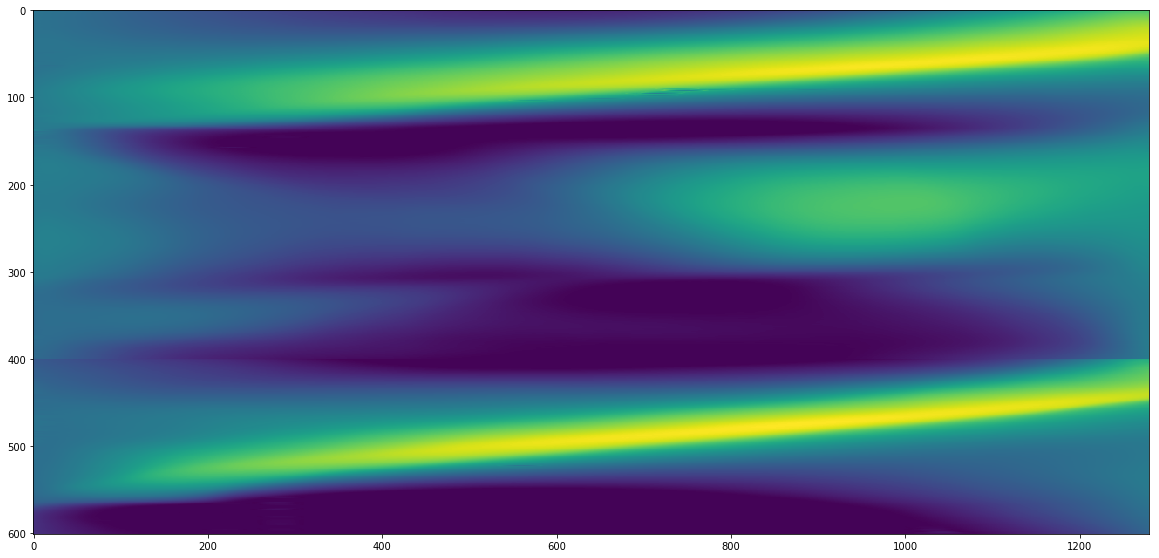

In [58]:
plt.figure(figsize=(4*5, 3*5))
plt.imshow(rope_positions)
plt.colorbar()

In [31]:
rope_positions.shape

(601, 1280)

In [43]:
@execute_quickly
def bendiness_space(f):
    result = np.zeros_like(f)
    
    nframes, npixels = rope_positions.shape
    for i in range(1, nframes-1):
        for j in range(1, npixels-1):
            result[i,j] = f[i,j-1] - 2*f[i,j] + f[i,j+1]

    return result[1:-1, 1:-1]

@execute_quickly
def bendiness_time(f):
    result = np.zeros_like(f)
    
    nframes, npixels = rope_positions.shape
    for i in range(1, nframes-1):
        for j in range(1, npixels-1):
            result[i,j] = f[i-1,j] - 2*f[i,j] + f[i+1,j]
            
    return result[1:-1, 1:-1]

In [49]:
def remove_blips(f):
    thresh = 3*np.average(np.abs(f))
    f = np.minimum(f, 3*thresh)
    f = np.maximum(f, -3*thresh)
    return f

bspace = remove_blips(bendiness_space(rope_positions))
btime = remove_blips(bendiness_time(rope_positions))

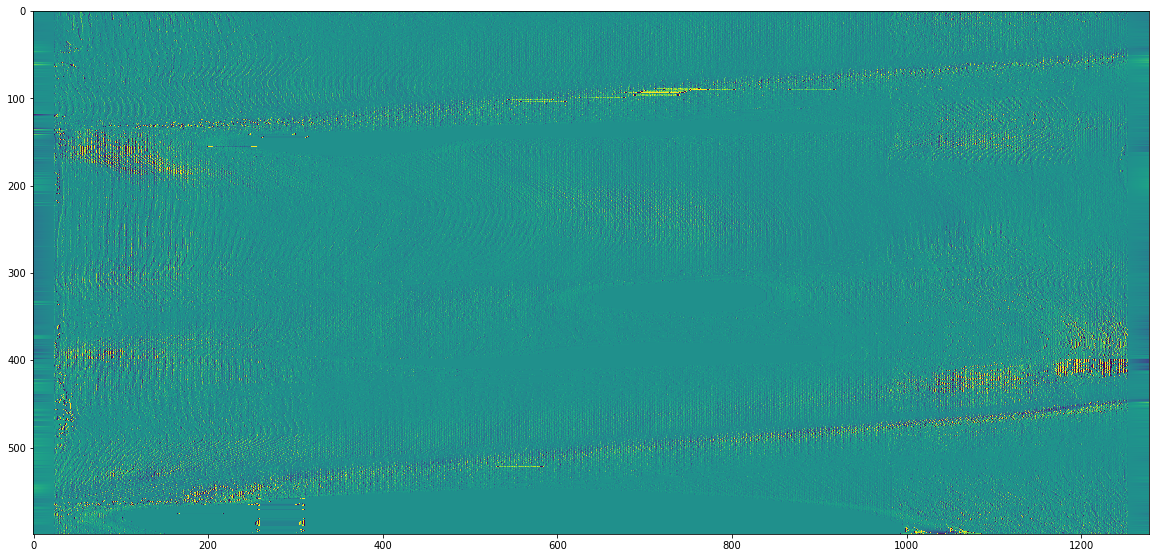

In [55]:
plt.figure(figsize=(4*5, 3*5))
plt.imshow(bspace)

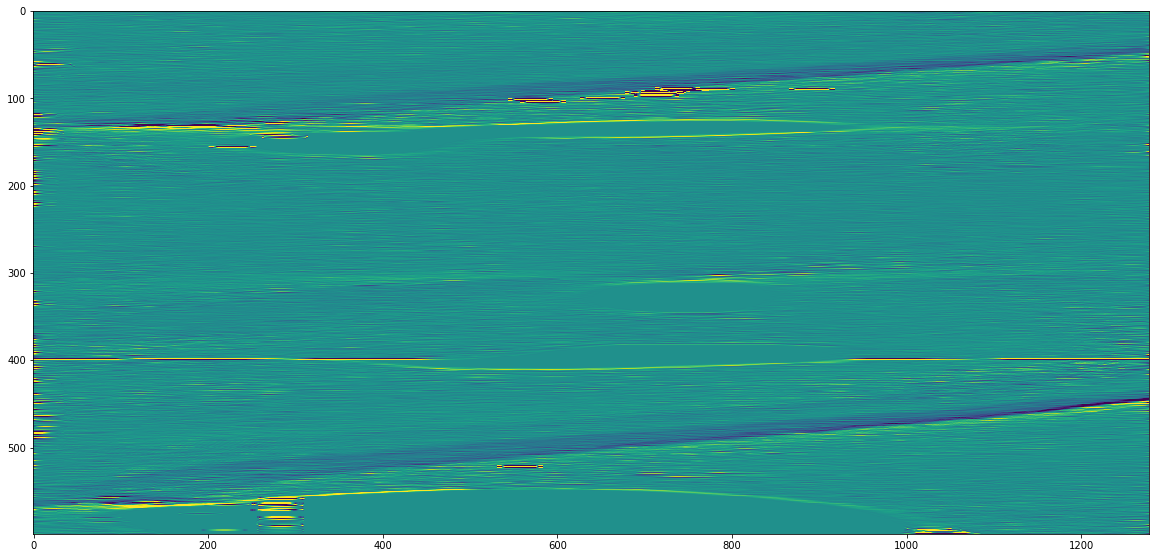

In [56]:
plt.figure(figsize=(4*5, 3*5))
plt.imshow(btime)

In [41]:
bspace = bendiness_space(rope_positions, 1)

## Predicition

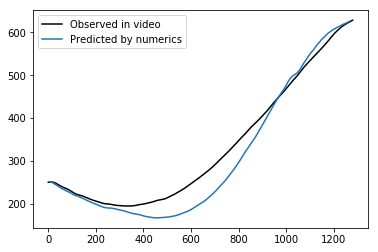

In [216]:
def bendiness(f, dx):
    result = np.zeros_like(f)

    # restricting at 'begin' and 'end'
    result[1:-1] = (1/dx**2) * (f[2:] - 2*f[1:-1] + f[:-2])
    return result

# constants
wave_speed = 1900
g = 9.81*640  # assuming the frame covers ~2 meters, dimension =  pixel/(s^2)

dt = 1/240  # since shooting at 240 fps
dx = 1.2*wave_speed*dt  # Choosing dx to maintain the CFL

x_rope = np.arange(0, 1279+dx, dx)
field = np.interp(x_rope, np.arange(1280), rope_positions[0])
velocity = np.interp(x_rope, np.arange(1280), ((rope_positions[1] - rope_positions[0])/dt))

ntimes = 30

for i in range(ntimes):
    t = i * dt
    field += dt * velocity

    # dirichlet boundary conditions
    field[0] = rope_positions[i][0]
    field[-1] = rope_positions[i][-1]

    velocity += dt * ((wave_speed**2) * bendiness(field, dx) - g)

plt.plot(rope_positions[ntimes-1], 'k', label='Observed in video')
plt.plot(x_rope, field, label='Predicted by numerics')
plt.legend()